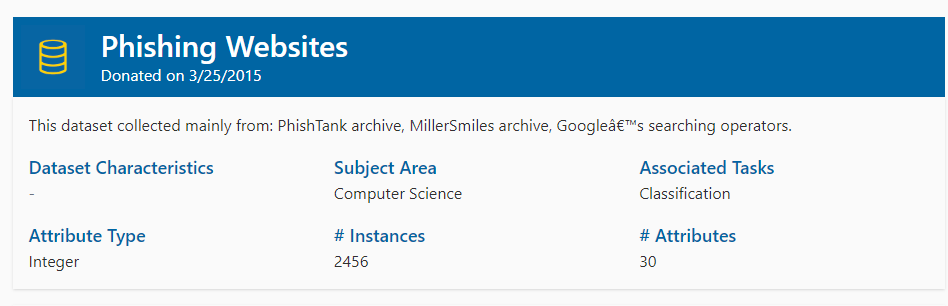


##  Data    
<a href="https://archive.ics.uci.edu/dataset/327/phishing+websites">UCI machine learning</a>,  <a href="https://www.kaggle.com/datasets/akashkr/phishing-website-dataset">Kaggle</a>
    

## Objectives

After completing this lab you will be able to:

* Use <a href="https://scikit-learn.org/stable/modules/svm.html">Scikit-Learn Support Vector Machine</a> algorithms to classify


**Additional Information**

One of the challenges faced by our research was the unavailability of reliable training datasets. In fact this challenge faces any researcher in the field. However, although plenty of articles about predicting phishing websites have been disseminated these days, no reliable training dataset has been published publically, may be because there is no agreement in literature on the definitive features that characterize phishing webpages, hence it is difficult to shape a dataset that covers all possible features. 
In this dataset, we shed light on the important features that have proved to be sound and effective in predicting phishing websites. In addition, we propose some new features.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#load_dataset">Load the  data</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


## import packages


In [1]:
#!pip install snapml

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn import svm # the classifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay # for model evaluation
%matplotlib inline 
import matplotlib.pyplot as plt

# the dataset in sklearn
from sklearn import datasets


import pickle # save the model

# suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data


In [3]:
## Load the digits dataset
phishing_website = pd.read_csv('uci-ml-phishing-dataset.csv')

## Basic EDA

In [4]:
# to rows of the dataset
phishing_website.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
# shape of the data
phishing_website.shape

(11055, 32)

**Missing values**

In [6]:
# check for missing values
phishing_website.isna().any().sum()

0

**Distribution of the dataset**

In [7]:
# let see if we dealing the imbalance dataset
phishing_website['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [8]:
# let see if we dealing the imbalance dataset
phishing_website['Result'].value_counts(normalize=True)

 1    0.556943
-1    0.443057
Name: Result, dtype: float64

**Data distribution:** Well our data is fairly balance with legitimate(1) websites making 55.69% of the dataset and 44.30% suspicious(-1)

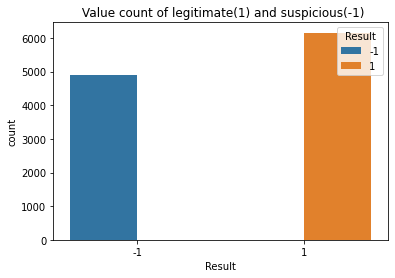

In [9]:
# plot of the distribution
sns.countplot(data=phishing_website, x="Result", hue="Result").set(title = " Value count of legitimate(1) and suspicious(-1)");

## Data pre-processing and selection, Train/Test


Let's set the Target and features

In [10]:
#target arrays
y = phishing_website['Result']

In [11]:
# drop the target and the id columns
phishing_website.drop(['Result', 'id'], axis = 1, inplace = True) 

In [12]:
# Create features
X = phishing_website.copy()

In [13]:
# check the columns to see if we have dropped the 'Result' and 'id'
X.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

**Train test split the dataset**

In [14]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=365, stratify=y)

Let's convert to an array so that sklearn find's it easy

In [15]:
# assign to the y variable
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [16]:
# assign the features
x_train = np.asarray(X_train)
x_test = np.asarray(X_test)

In [17]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (8844, 30) (8844,)
Test set: (2211, 30) (2211,)


## Feature scaling


In [18]:
scaler = StandardScaler() # scaler objecy
x_train = scaler.fit_transform(x_train) # allow the scaler object to learn the features and transform the training data
x_test =  scaler.transform(x_test) # apply the learned features on the test set

In [19]:
# scaled x_train
x_train[0:1]

array([[-1.38208821, -0.48260137, -2.56231156,  0.41978595, -2.58014396,
        -0.39065721,  1.14564228,  0.82048974, -0.69830987,  0.47873472,
         0.39735971, -2.2563043 ,  0.82874636,  1.50564515, -1.16102549,
         2.10707552,  0.47283717, -2.3970806 , -0.36206482,  0.36763562,
         0.2124688 ,  0.48958883,  0.31773975, -1.07371898, -1.48314213,
         0.85965025, -0.59458839, -2.47866502,  1.15247711,  0.40835599]])

In [20]:
# scaled x_test
x_test[0:1]

array([[ 0.72354282,  0.81588556,  0.3902726 ,  0.41978595,  0.38757527,
        -0.39065721, -1.29611222, -1.37177952, -0.69830987,  0.47873472,
         0.39735971, -2.2563043 ,  0.82874636, -1.29211211,  0.14834832,
        -0.53225256,  0.47283717,  0.41717412, -0.36206482,  0.36763562,
         0.2124688 ,  0.48958883,  0.31773975, -1.07371898, -1.48314213,
        -1.55238872, -0.59458839,  0.40344298,  1.15247711,  0.40835599]])

<div id="svm_snap">
    <h2>Build a Support Vector Machine classifer with scikit-learn</h2>
</div>


In [21]:
svc = svm.SVC(C=10, kernel='rbf')

In [22]:
# train an SVM model using Snap ML
clf = svc.fit(x_train, y_train)

After being fitted, the model can then be used to predict new values:


In [23]:
yhat = clf.predict(x_test)
yhat[0:5]

array([-1,  1,  1,  1,  1], dtype=int64)

**Metrics**

In [24]:
svm_f1 = f1_score(y_test, yhat, average='weighted')
svm_accuracy = accuracy_score(y_test, yhat)
svm_precision = precision_score(y_test, yhat, average='micro')

print("Avg F1-score: %.4f" % svm_f1)
print("Accuracy: %.4f" % svm_accuracy)
print("Precision: %.4f" % svm_precision)

Avg F1-score: 0.9665
Accuracy: 0.9665
Precision: 0.9665


**Save the SVM model:**

In [25]:
#save the trained model
pickle.dump(clf, open('Phishing_Websites_SVM.pkl','wb'))

<h2 id="evaluation">Evaluation</h2>


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [27]:
# classification report
print (classification_report(y_test, yhat,labels=np.unique(yhat)))

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       980
           1       0.96      0.98      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



**Confusion Matrix display:**

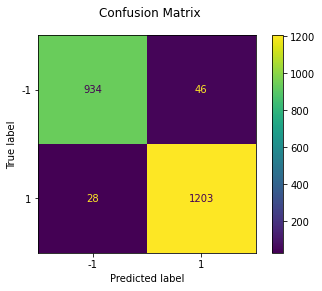

Confusion matrix:
[[ 934   46]
 [  28 1203]]


In [28]:
# confusion matrics
disp = ConfusionMatrixDisplay.from_predictions(y_test, yhat)
disp.figure_.suptitle("Confusion Matrix")

plt.show()


print(f"Confusion matrix:\n{disp.confusion_matrix}")

### **Report**

In [29]:
metric = {
  "Accuracy": [str(round(svm_f1*100,2))+"%"],
  "F1 score" : [str(round(svm_accuracy*100,2))+"%"],
  "Precision": [str(round(svm_precision*100,2))+"%"]
}


Report = pd.DataFrame(metric)
Report = Report.rename(index={ 0:'Support Vector Machine'})

In [30]:
# now print the classification report
Report 

,Accuracy,F1 score,Precision
Support Vector Machine,96.65%,96.65%,96.65%


### **Now over to you TUNE the PARAMETERS to see if the ACCURACY and F1-SCORE will improve.**

# Thank you for completing this lab!